In [79]:
%matplotlib notebook
from importlib import reload  
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(1)
from mpl_toolkits import mplot3d 

In [80]:
def plotNN2d(NN):
    fig = plt.figure() 
    ax = plt.axes(projection ='3d') 
    x = y = np.arange(-3.0, 3.0, 0.05)
    X, Y = np.meshgrid(x, y)
    # z = (np.sin(X **2) + np.cos(Y **2) ) 
    XY = np.concatenate([np.reshape(X,[X.shape[0]*X.shape[1],1]),np.reshape(Y,[Y.shape[0]*Y.shape[1],1])],axis = 1)
    Z = np.reshape(NN.predict(XY),X.shape)
    ax.plot_surface(X, Y, Z) 
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

In [157]:
inputs = keras.Input(shape=(2))
l1 = layers.Dense(1, activation = 'linear',use_bias = False)
outputs1 = l1(inputs)
tf.gradients(inputs,outputs1)
# dV_nn = keras.Model(inputs=inputs, outputs= outputs2[:,1:])

RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.

In [155]:
# inputs0 = keras.Input(shape=(2))
# l1 = layers.Dense(1, activation = 'linear',use_bias = False)
# outputs0 = l1(inputs0)
# outputs0 = outputs0**2
# NN = keras.Model(inputs=inputs0, outputs=outputs0)
# # NN.set_weights([np.array([[0],[0]], dtype='float32')])

inputs = keras.Input(shape=(1))
l1 = layers.Dense(1, activation = 'linear',use_bias = False)
with tf.GradientTape() as t:
    t.watch(inputs)
    outputs1 = l1(inputs**2)
outputs2 = t.gradient(outputs1, inputs)
u_nn = keras.Model(inputs=inputs, outputs = outputs2)

In [156]:
x_train = np.random.normal(0,1,size = (1000,1))
y_train = x_train**2
u_nn.compile(loss = 'mse')
u_nn.fit(x_train,y_train)

Train on 1000 samples
  32/1000 [..............................] - ETA: 1s

ValueError: No gradients provided for any variable: ['dense_52/kernel:0'].

In [135]:
u_nn.predict([[1]])

array([[-0.86328834]], dtype=float32)

In [122]:
u_nn.set_weights([np.array([[-1],[1]], dtype='float32')])
# # model.dV_nn.set_weights([np.array([[-2],[2]], dtype='float32')])
# V_nn.set_weights([np.array([[1],[-1]], dtype='float32')])
# # model.rho_nn.set_weights([np.array([[1]], dtype='float32')])
# V_nn.compile(loss= 'mse')
# u_nn.compile(loss= 'mse')
V_nn.predict([[10,1]]),\
u_nn.predict([[10,1]])

(array([[81.]], dtype=float32), array([[-10.075317]], dtype=float32))

In [123]:
V_nn.summary()

Model: "model_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_77 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 2         
_________________________________________________________________
tf_op_layer_Square (TensorFl [(None, 1)]               0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [124]:
u_nn.summary()

Model: "model_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_77 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_34 (Dense)                (None, 1)            2           input_77[0][0]                   
__________________________________________________________________________________________________
tf_op_layer_Square (TensorFlowO [(None, 1)]          0           dense_34[0][0]                   
__________________________________________________________________________________________________
tf_op_layer_ones_like_34/Shape  [(2,)]               0           tf_op_layer_Square[0][0]         
__________________________________________________________________________________________

<IPython.core.display.Javascript object>


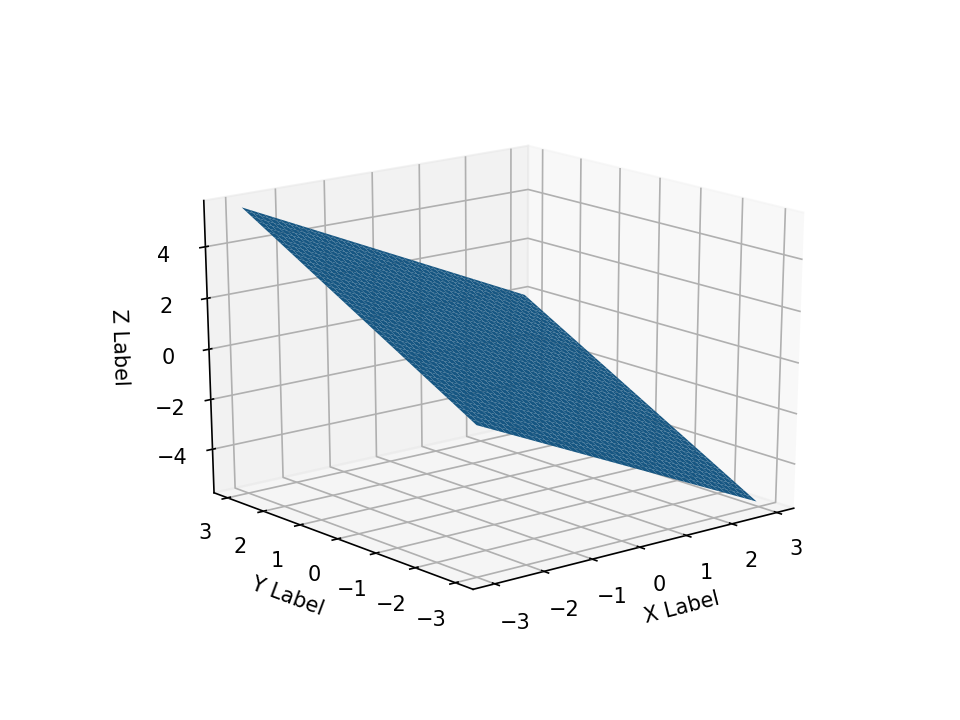

In [49]:
plotNN2d(u_nn)

In [16]:
def initial_NN():
    inputs0 = keras.Input(shape=(2))
    l1 = layers.Dense(1, activation = 'linear',use_bias = False)
    outputs0 = l1(inputs0)
#     outputs0 = outputs0**2
    NN = keras.Model(inputs=inputs0, outputs=outputs0)
    
    
    inputs = keras.Input(shape=(2))
    with tf.GradientTape() as t:
        t.watch(inputs)
        outputs1 = NN(inputs)
    outputs2 = t.gradient(outputs1, inputs)
    u_nn = keras.Model(inputs=inputs, outputs=outputs2[:,0])
    V_nn = keras.Model(inputs=inputs, outputs=outputs1)
    return u_nn, V_nn
u_nn, V_nn = initial_NN()

In [28]:
U_start = keras.Input(shape=(1))
Y_start = keras.Input(shape=(1))
inputs = [U_start, Y_start]
Z_start = tf.concat([U_start, Y_start], axis = 1)
u_now = u_nn(Z_start)
V_now = V_nn(Z_start)
outputs = u_now + V_now
test = keras.Model(inputs=inputs, outputs=outputs)
test.compile(loss='mse', optimizer='Adam')

x_train = [np.random.normal(size = (100,1)),np.random.normal(size = (100,1))]
y_train = np.random.normal(size = (100,1))

test.evaluate(x_train,y_train)

In [30]:
test.compile(loss = 'mse')

In [31]:
test.evaluate(x_train,y_train)

100/100 [==============================] - 0s 681us/sample - loss: 6.1232


6.1231824493408205

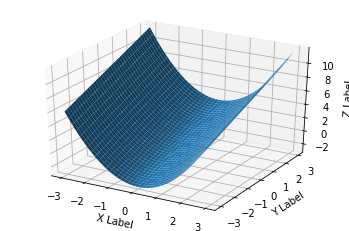

In [8]:

import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

def fun(x, y):
    return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [31]:
n=1000
d=1001
steps = 10
dt = 0.1
T = 1

In [47]:
a = tf.constant([1,2,3,4])
b = tf.constant([[1,1],[2,1],[3,1],[4,1]])

In [51]:
b[:,0:1]

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[1],
       [2],
       [3],
       [4]])>

In [46]:
a + b

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7],
       [5, 6, 7, 8]])>

In [13]:
t1 = [[1], [4], [5]]
t2 = [[7, 8, 9], [10, 11, 12], [13, 14, 15]]
tf.concat([t1, t2], 1)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 1,  7,  8,  9],
       [ 4, 10, 11, 12],
       [ 5, 13, 14, 15]])>

In [4]:
y = tf.constant([10,10])

In [9]:
x[:,0] = x[:,0] + y

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [6]:
z

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([11, 14])>

In [40]:
steps = 100
dt = 0.01
sqrtdt = np.sqrt(dt)
T = steps * dt
M = 10
n = 1000
H = 0.3
d = n+1
seed = 0
X0 = np.zeros(shape = (M,d))

In [44]:
x,y = trainning_data(H,seed,M,steps,n,T,dt,X0)

In [43]:
def trainning_data(H,seed,M,N,n,T,dt,X0):
    # parameter ready
    alpha = H + 0.5 
    t_grid = np.arange(N+1)*dt
    dh = ((10*(1-2*H)**2)/(n*(5-2*H)**2))**(1/5)/T
    h_grid = np.arange(n+1)*dh
    h1_grid = h_grid**(0.5-H)
    h2_grid = h_grid**(1.5-H)
    c_grid = (h1_grid[1:] - h1_grid[:-1]) / (0.5-H) / math.gamma(H+0.5) / math.gamma(0.5-H)
    gamma_grid = (h2_grid[1:] - h2_grid[0:-1]) / c_grid / (1.5-H) / math.gamma(H+0.5) / math.gamma(0.5-H) 
    # initial distribution
    x = [X0]
    # generate the increments
    Y = X0[:,1:]
    X = np.zeros(shape = (M,n+1))
    np.random.seed(seed)
    for it in range(N):
        dw =  np.random.normal(0,np.sqrt(dt),size = (M,1))
        dY = - gamma_grid * Y * dt + np.tile(dw,(1,n))
        Y = Y + dY
        dfBM = np.sum(c_grid * dY, axis = -1)
        X[:,0] = dfBM
        X[:,1:] = dY
        x = x + [X]
    y = np.zeros(shape = (M,1))
    return x, y

In [2]:
def NN_plot(nn):
    nn.compile(loss = 'mse')
    xgrid = np.linspace(-10,10,201)
    y = nn.predict(xgrid)
    plt.plot(xgrid,y)
    plt.grid()

In [3]:
inputs = keras.Input(shape=(1))
l1 = layers.Dense(8, activation = 'elu')
l2 = layers.Dense(8, activation = 'elu')
l3= layers.Dense(1, activation = 'linear')
outputs = l1(inputs)
outputs = l2(outputs)
outputs = l3(outputs)
nn = keras.Model(inputs=inputs, outputs=outputs, name = 'control_NN')

Model: "control_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


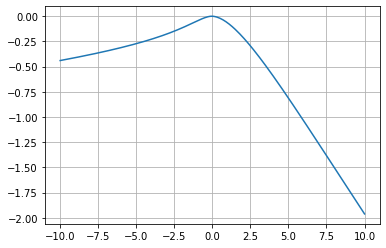

In [4]:
nn.summary()
NN_plot(nn)

In [5]:
nn1= keras.models.clone_model(nn)

In [7]:
nn1.set_weights(nn.get_weights())

Model: "control_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


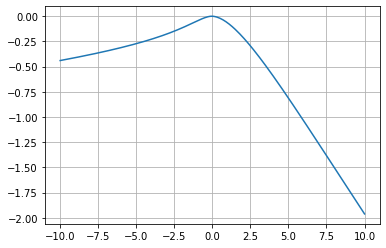

In [8]:
nn1.summary()
NN_plot(nn1)

In [3]:
x = tf.constant([1,2,3])
x**2

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 4, 9])>

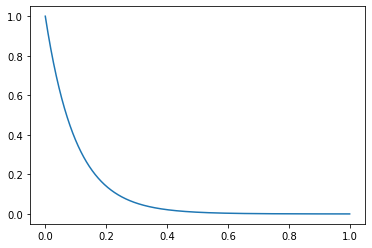

In [9]:
T=10
x = np.linspace(0,1,1000)
y = np.exp(-x*(T -x))
plt.plot(x,y)

In [3]:
x = np.random.uniform(0, 10, size=100)
x.mean()

4.935387423968675

In [4]:
# Global Parameter
steps = 100
dt = 0.01
sqrtdt = np.sqrt(dt)
T = steps * dt
M = 1000

In [12]:
np.random.seed(0)
X = np.random.normal(0,np.sqrt(1/2),size = (M,1))
X = np.random.uniform(-10, 10, size= (M,1))
W = [np.random.normal(0,np.sqrt(dt),size = (M,1)) for i in range(steps)]      

In [31]:
W = [np.random.normal(0,np.sqrt(dt),size = (M,1)) for i in range(steps)]    

In [32]:
X = X
int1 = np.zeros_like(X)
int2 = np.zeros_like(X)
for i in range(steps):
    dW = W[i]
    int1 = int1 + (2*X**2)*dt
    int2 = int2 + 2*X*dW
    X = X + dW - X*dt
out = X**2 + int1 - int2 - X0**2 - T 

In [33]:
np.mean(out**2)

2054.767662437356

In [34]:
X.mean(), X.var()

(0.019255122747233153, 0.5139773299398989)

(array([  8.,  16.,  57., 147., 189., 234., 175.,  97.,  56.,  21.]),
 array([-2.1905242 , -1.77895109, -1.36737798, -0.95580487, -0.54423175,
        -0.13265864,  0.27891447,  0.69048759,  1.1020607 ,  1.51363381,
         1.92520692]),
 <a list of 10 Patch objects>)

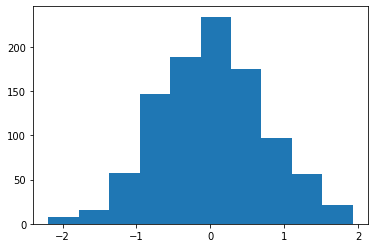

In [35]:
plt.hist(X)

In [ ]:
for i in range(5):
    W = [np.random.normal(0,np.sqrt(dt),size = (M,1)) for i in range(steps)]   

In [ ]:
X = X0
int1 = np.zeros_like(X)
int2 = np.zeros_like(X)
for i in range(steps):
    dW = x_train[i+1]
    int1 = int1 + (2*X**2)*dt
    int2 = int2 + 2*X*dW
    X = X + dW - X*dt
out = X**2 + int1 - int2 - X0**2 - T 
np.mean(out**2)

In [52]:
# Value Neural Network: V(x)

inputs = keras.Input(shape=(1))
l1 = layers.Dense(8, activation = 'tanh')
# l2= layers.Dense(8, activation = 'relu')
l3= layers.Dense(1, activation = 'linear')
outputs = l1(inputs)
# outputs = l2(outputs)
outputs = l3(outputs)
# outputs = -inputs
value_NN = keras.Model(inputs=inputs, outputs=outputs, name = 'value_NN')
value_NN.summary()
# value_NN.compile(loss = 'mse')
# xgrid = np.linspace(-10,10,201)
# y = value_NN.predict(xgrid)
# plt.plot(xgrid,y)
# plt.grid()

Model: "value_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


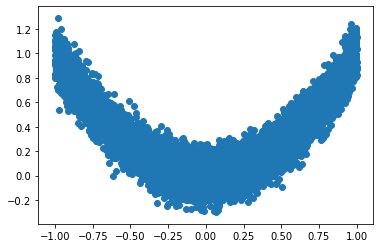

Train on 10001 samples
Epoch 1/10
10001/10001 [==============================] - 1s 53us/sample - loss: 0.1381
Epoch 2/10
10001/10001 [==============================] - 0s 30us/sample - loss: 0.1022
Epoch 3/10
10001/10001 [==============================] - 0s 32us/sample - loss: 0.0961
Epoch 4/10
10001/10001 [==============================] - 0s 29us/sample - loss: 0.0874
Epoch 5/10
10001/10001 [==============================] - 0s 30us/sample - loss: 0.0716
Epoch 6/10
10001/10001 [==============================] - 0s 32us/sample - loss: 0.0463
Epoch 7/10
10001/10001 [==============================] - 0s 29us/sample - loss: 0.0231
Epoch 8/10
10001/10001 [==============================] - 0s 30us/sample - loss: 0.0140
Epoch 9/10
10001/10001 [==============================] - 0s 29us/sample - loss: 0.0125
Epoch 10/10
10001/10001 [==============================] - 0s 22us/sample - loss: 0.0121
tf.Tensor(0.00997749250382185, shape=(), dtype=float64)


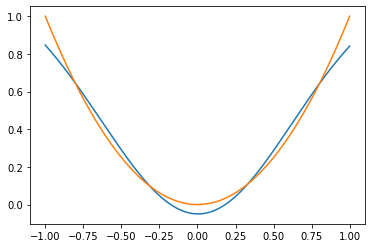

In [53]:
# inputs = keras.Input(shape = (1,), dtype ='float64')
# V1 = keras.layers.Dense(8, activation = 'tanh', dtype ='float64')
# # V2 = keras.layers.Dense(4, activation = 'tanh', dtype ='float64')
# V3 = keras.layers.Dense(1, dtype ='float64')
# outputs = V3(V1(inputs))
# test = keras.Model(inputs = inputs, outputs = outputs)
# test.summary()

x_train = np.linspace(-1,1,10001)
y_train = x_train**2 + np.random.normal(0,0.1,10001)
plt.scatter(x_train,y_train)
plt.show()
value_NN.compile(loss = 'mean_squared_error', optimizer='adam')
value_NN.fit(x=x_train,y=y_train, epochs=10, verbose = 1)
value_NN.evaluate(x_train,y_train)
print(keras.losses.MeanSquaredError()(x_train**2,y_train))
y = value_NN.predict(x_train)
plt.plot(x_train,y)
plt.plot(x_train,x_train**2)
plt.show()

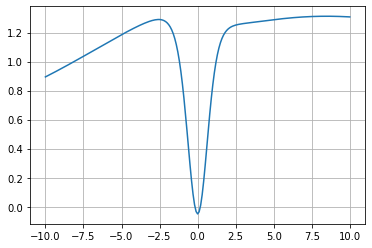

In [54]:
value_NN.compile(loss = 'mse')
xgrid = np.linspace(-10,10,201)
y = value_NN.predict(xgrid)
plt.plot(xgrid,y)
plt.grid()